## Data sources

For this exercise two data sources have been chosen. Both of them are Wikipedia categories, which are Twitter and YouTube.
The corresponding links are following:

- https://en.wikipedia.org/wiki/Category:Twitter
- https://en.wikipedia.org/wiki/Category:YouTube

---

## Setup

This part discusses in short the setup in order to be able to run the following script



The following code install the required dependencies.

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install wikipedia-api


You should consider upgrading via the '/Users/gcm/PyProjects/CLT/venv/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/gcm/PyProjects/CLT/venv/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/gcm/PyProjects/CLT/venv/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/gcm/PyProjects/CLT/venv/bin/python3.10 -m pip install --upgrade pip' command.


The next code block imports are required packages which have been installed prior.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import wikipediaapi
from wordcloud import WordCloud

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

---

## Retrieving Data from Wikipedia API

Accessing the Wikipedia API and saving the pages 'Category:Twitter' and 'Category:YouTube' to the variables 'cat_twitter' and 'cat_youtube'.
This variable will be used in the next step.

In [3]:
wiki = wikipediaapi.Wikipedia('en')
cat_twitter = wiki.page('Category:Twitter')
twitter = wiki.page('Twitter')
cat_youtube = wiki.page('Category:YouTube')
youtube = wiki.page('YouTube')

In [4]:
cat_twitter.text

'Twitter and related articles, as well as Twitter powered blogs.'

In [5]:
cat_youtube.text

'This category covers articles on the subject of YouTube.'

The function below creates a dictionary. The input are articles which are listet in the Twitter/YouTube category.
The name of the article is the key. As value is passed a list, which contains the summary of the article and the amount of links which are present on each article.
The data structure looks like this: `{key1: [value1.1, value1.2], key2: [value2.1, value.2], ...}`

In [6]:
def categories(name):
	mdict = {}
	for c in name.values():
		l = []
		if not 'Category:' in c.title:
			link_count = len(wiki.page(c.title).links)
			l.append(c.summary)
			l.append(link_count)
			mdict[c.title] = l
	return mdict

### Twitter

The wikipedia page is passed to the function. Note, in this step the method 'categorymembers' is used to access all members of the corresponding category

In [7]:
twitter_dict = categories(cat_twitter.categorymembers)

The keys of the dict are printed out to gain an overview of the article names which have been retrieved

In [8]:
twitter_dict.keys()

dict_keys(['Twitter', 'Aufschrei', '100 Nichi Go ni Shinu Wani', 'Artificial Intelligence for Digital Response', 'Justin Bieber', 'Billboard Twitter Real-Time', 'Black Twitter', 'Bluesky (protocol)', 'Bootstrap (front-end framework)', 'Breaking Tweets', 'Chaos with Ed Miliband', 'Dogs at polling stations', 'FlockDB', 'Frogtwitter', 'Hashtag', 'History of Twitter', 'Internet activism during the 2009 Iranian election protests', '2009 Iranian presidential election protests', 'ISIS-chan', 'KHive', 'List of Twitter features', 'The Magical Moment', 'Mention (blogging)', 'Mikeyy', 'Museum Week', 'Republik Twitter', 'Roger Cosmonkey', 'Rotation Curation', 'Safe Space (South Park)', 'Takahiro Shiraishi', 'Shorty Awards', 'Skank Hunt', 'Snowflake ID', 'Elon Musk', 'Stan Twitter', 'Such Tweet Sorrow', 'Tawawa on Monday', 'Twitter trends', 'Twitter bomb', 'Twitter diplomacy', 'Twitter Power', 'Twitter Revolution', 'Twitter usage', 'Twitter verification', 'Twitter Zero', 'Twitterature', 'Unknown Nu

The dict can be accessed by the following code. The key has to be passed, additionally the index (in this case 0) to access the summary of the article. The meaning of '[:100]' is to print only the first 100 characters of the value.

In [9]:
twitter_dict['Twitter'][0][:100]

'Twitter is a microblogging, social networking service owned by American company Twitter, Inc., on wh'

In order to see how many links are on the Twitter article the dict can be accessed with index 1.

In [10]:
twitter_dict['Twitter'][1]

953

### YouTube

The same procedure is performed with the second topic, which is YouTube

In [11]:
youtube_dict = categories(cat_youtube.categorymembers)

In [12]:
youtube_dict.keys()

dict_keys(['YouTube', 'List of influencer boxing matches', '2013 YouTube Music Awards', '2015 YouTube Music Awards', 'Alternative Influence: Broadcasting the Reactionary Right on YouTube', 'Bob Thunder: Internet Assassin', 'BookTube', 'Censorship of YouTube', 'Steve Chen', 'Collab house', 'Content house', 'Content ID (system)', 'YouTube Creator Awards', 'Creator Clash', 'Deen The Great vs Walid Sharks', 'Face to Face with "Weird Al" Yankovic', 'FameBit', 'Google Preferred', 'Chad Hurley', 'InfoChammel', 'Invidious', 'Jay Swingler vs Cherdleys', 'Justin Bieber: Seasons', 'Salar Kamangar', 'Jawed Karim', 'Keeping It Real Art Critics', 'Kevin Hart: What The Fit', 'YouTube Kids', 'KSI vs Dillon Danis', 'KSI vs Logan Paul', 'KSI vs Swarmz & Luis Alcaraz Pineda', 'KSI vs. Logan Paul II', "Let's Play", 'Lion Versus', 'Mothership (composition)', 'Multi-channel network', 'YouTube Music Awards', 'Alex Okosi', 'Petit Tube', 'PewDiePie vs T-Series', 'Playlist Live', 'Project for Awesome', 'Remaste

In [13]:
youtube_dict['YouTube'][0][:100]

'YouTube is an American online video sharing and social media platform headquartered in San Bruno, Ca'

In [14]:
youtube_dict['YouTube'][1]

1745

---

## Saving dict to pandas dataframe

The loop below saves the dict into a dataframe, which is printed afterwards. Additionally, a label for each topic is inserted.
This step is executed for Twitter and YouTube.

In [66]:
d = []
for i in range(len(twitter_dict)):
	d.append({
		'title': list(twitter_dict.keys())[i],
		'description': list(twitter_dict.values())[i][0],
		'links': list(twitter_dict.values())[i][1],
	})
df_twitter = pd.DataFrame(d)
df_twitter['label'] = 'twitter'
df_twitter

,title,description,links,label
0,Twitter,"Twitter is a microblogging, social networking service owned by American company Twitter, Inc., on which users post and interact with messages known as ""tweets"". Registered users can post, like, and retweet tweets, while unregistered users only have the ability to read public tweets. Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs. Before April 2020, services were accessible via SMS. Tweets were originally restricted to 140 characters, but the limit was doubled to 280 for non-CJK languages in November 2017. Audio and video tweets remain limited to 140 seconds for most accounts.\nTwitter was created by Jack Dorsey, Noah Glass, Biz Stone, and Evan Williams in March 2006 and launched in July of that year. Twitter, Inc. is based in San Francisco, California and has more than 25 offices around the world. By 2012, more than 100 million users posted 340 million tweets a day, and the service handled an average of 1.6 billion search queries per day. In 2013, it was one of the ten most-visited websites and has been described as ""the SMS of the Internet"". By the start of 2019, Twitter had more than 330 million monthly active users. In practice, the vast majority of tweets are written by a minority of users. As of 2020, fake accounts were estimated to make up 15% of Twitter accounts, approximately 48 million accounts.On April 25, 2022, the Twitter board of directors agreed to a $44 billion buyout by Elon Musk, making it one of the biggest deals to take a company private. After a protracted period of controversy and legal battles, the deal closed on October 27. Following Musk's takeover, Twitter has been criticized for increasingly promoting hate speech, followed by advertiser moratoriums, mass firings and mass quitting.",953,twitter
1,Aufschrei,"#Aufschrei (""outcry"") is a German hashtag which went viral on the social media platform Twitter in 2013 with the goal of raising awareness about experiences of sexism in Germany. The Tweets began to appear in response to the publication of an article in which journalist Laura Himmelreich describes an invasive encounter with politician Rainer Brüderle of Germany's Free Democratic Party (FDP); within the German public, these tweets triggered a national debate on sexism, particularly experiences of everyday sexism.",39,twitter
2,100 Nichi Go ni Shinu Wani,"100 Nichi Go ni Shinu Wani (100日後に死ぬワニ, ""A Crocodile Who Will Die in 100 Days"") is a Japanese web manga series written and illustrated by Yuuki Kikuchi. The series, which depicts a crocodile's last 100 days before his death, was self-published on Twitter between December 12, 2019, and March 20, 2020. A manga compilation was published by Shougakukan on April 8, 2020. An anime film adaptation produced by TIA, titled 100 Nichikan Ikita Wani (100日間生きたワニ, ""A Crocodile Who Lived For 100 Days""), was scheduled to be released on May 28, 2021, but was delayed to July 9, 2021, due to the COVID-19 pandemic.",24,twitter
3,Artificial Intelligence for Digital Response,"Artificial Intelligence for Digital Response (AIDR) is a free and open source platform to filter and classify social media messages related to emergencies, disasters, and humanitarian crises. It has been developed by the Qatar Computing Research Institute and awarded the Grand Prize for the 2015 Open Source Software World Challenge.Muhammad Imran stated that he and his team ""have developed novel computational techniques and technologies, which can help gain insightful and actionable information from online sources to enable rapid decision-making"" - according to him the system ""combines human intelligence with machine learning techniques, to solve many real-world challenges during mass emergencies and health issues"".",22,twitter
4,Justin Bieber,"Justin Drew Bieber ( BEE-bər; born March 1, 1994) is a Canadian singer. Bieber is recognized for his genre-melding musicianship and has played an

In [67]:
d = []
for i in range(len(youtube_dict)):
	d.append({
		'title': list(youtube_dict.keys())[i],
		'description': list(youtube_dict.values())[i][0],
		'links': list(youtube_dict.values())[i][1],
	})
df_youtube = pd.DataFrame(d)
df_youtube['label'] = 'youtube'
df_youtube

,title,description,links,label
0,YouTube,"YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.In October 2006, 18 months after posting its first video and 10 months after its official launch, YouTube was bought by Google for $1.65 billion. Google's ownership of YouTube expanded the site's business model, expanding from generating revenue from advertisements alone, to offering paid content such as movies and exclusive content produced by YouTube. It also offers YouTube Premium, a paid subscription option for watching content without ads. YouTube also approved creators to participate in Google's AdSense program, which seeks to generate more revenue for both parties. YouTube reported revenue of $19.8 billion in 2020. In 2021, YouTube's annual advertising revenue increased to $28.8 billion.Since its purchase by Google, YouTube has expanded beyond the core website into mobile apps, network television, and the ability to link with other platforms. Video categories on YouTube include music videos, video clips, news, short films, feature films, documentaries, audio recordings, movie trailers, teasers, live streams, vlogs, and more. Most content is generated by individuals, including collaborations between YouTubers and corporate sponsors. Established media corporations such as Disney, Paramount, and Warner Bros. Discovery have also created and expanded their corporate YouTube channels to advertise to a larger audience.\nYouTube has had an unprecedented social impact, influencing popular culture, internet trends, and creating multimillionaire celebrities. Despite all its growth and success, YouTube has been widely criticized. Criticism of YouTube includes the website being used to facilitate the spread of misinformation, copyright issues, routine violations of its users' privacy, enabling censorship, and endangering child safety and wellbeing.",1745,youtube
1,List of influencer boxing matches,"These bouts consist of YouTubers, Twitch streamers, TikTokers, and online influencers.",78,youtube
2,2013 YouTube Music Awards,"The 2013 YouTube Music Awards, abbreviated as the YTMA, was the inaugural music award show presented by YouTube. The inaugural award show was held on November 3, 2013, streamed live from Pier 36 in New York City, with additional shows in Seoul, Moscow, Rio de Janeiro, and London.\n\nUnlike other award shows, the winners were entirely voted on by fans. The show was directed by Spike Jonze.""None of us have done anything live before or an awards show – in a way we're all like amateurs on YouTube ourselves, making our first video. So even if it's messy, it'll be live,"" Jonze admitted to Billboard.com.",214,youtube
3,2015 YouTube Music Awards,"The 2015 YouTube Music Awards is the second ceremony for YouTube Music Awards. The inaugural 2013 ceremony was met with mixed reception. In November 2014, YouTube announced its intentions to reinvent the purpose of the award show. Additionally, the site announced there will be no live ceremony for the awards. YouTuber Tyler Oakley hosted the awards presentation.",181,youtube
4,Alternative Influence: Broadcasting the Reactionary Right on YouTube,Alternative Influence: Broadcasting the Reactionary Right on YouTube is a 2018 report by researcher Rebecca Lewis published at the think tank Data & Society that performs network analysis on a collection of 65 political influencers on 81 YouTube channels. Lewis argues that this network propagates right-wing ideology.,22,youtube
...,...,...,...,...
75,YouTube Vanced,"YouTube Vanced (or simply Vanced) is a discon

Below are shown two ways how to access data in the dataframe. The output of both variants is identically.
In SQL language the query would be performed like this: `SELECT description FROM df_youtube WHERE title='YouTube';`

In [17]:
df_youtube.query("title=='YouTube'")['description']

0    YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.In October 2006, 18 months after posting its first video and 10 months after its official launch, YouTube was bought by Google for $1.65 billion. Google's ownership of YouTube expanded the site's business model, expanding from generating revenue from advertisements alone, to offering paid content such as movies and exclusive content produced by YouTube. It also offers YouTube Premium, a paid subscription option for watching content without ads. YouTube also approved creators to participate in Goo

In [68]:
df_youtube['description'].loc[df_youtube['title']=='YouTube']

0    YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.In October 2006, 18 months after posting its first video and 10 months after its official launch, YouTube was bought by Google for $1.65 billion. Google's ownership of YouTube expanded the site's business model, expanding from generating revenue from advertisements alone, to offering paid content such as movies and exclusive content produced by YouTube. It also offers YouTube Premium, a paid subscription option for watching content without ads. YouTube also approved creators to participate in Goo

---

## Exploratory Data Analysis (EDA)

In order to gain an rough overview of the data, the data is printed and order descending where the links are the most. Justin Bieber has the most link on this article with 1132.

In [18]:
df_twitter.sort_values(by=['links'], ascending=False)

,title,description,links,label
4,Justin Bieber,"Justin Drew Bieber ( BEE-bər; born March 1, 1994) is a Canadian singer. Bieber is recognized for his genre-melding musicianship and has played an influential role in modern-day popular music. He was discovered by American record executive Scooter Braun and signed with RBMG Records in 2008, gaining recognition with the release of his debut seven-track EP My World (2009) and soon establishing himself as a teen idol.\nBieber achieved commercial success with his teen pop-driven debut studio album, My World 2.0 (2010), which debuted atop the US Billboard 200, making him the youngest solo male act to top the chart in 47 years. The album spawned the internationally successful single ""Baby"", which became one of the highest certified singles of all time in the US. His second studio album, Under the Mistletoe (2011), became the first Christmas album by a male artist to debut at number one in the US. Bieber experimented with dance-pop in his third studio album, Believe (2012), and went on to become the first artist in history with five US number-one albums at age 18. Between 2013 and 2014, Bieber was involved in multiple controversies and legal issues, which had a drastic impact on his public image.In 2015, Bieber explored EDM with the release of ""Where Are Ü Now"", which won the Grammy Award for Best Dance/Electronic Recording. The song's musical direction played an instrumental role in his fourth studio album, Purpose, which produced three US number-one singles: ""Love Yourself"", ""Sorry"", and ""What Do You Mean?"". He became the first artist in history to occupy the entire top three of the UK Singles Chart. Bieber diversified on numerous collaborations between 2016 and 2017, including ""I'm the One"" and his remix to ""Despacito"" — both reaching number one on the US Billboard Hot 100 a week apart, making him the first artist in history to chart new number-one songs in consecutive weeks. ""Despacito"" was named the greatest Latin song of all time by Billboard and earned Bieber his career-first Latin Grammy Award. In 2019, he released a country collaboration with Dan + Shay, ""10,000 Hours"", which won the Grammy Award for Best Country Duo/Group Performance.In 2020, Bieber released his R&B-led fifth studio album, Changes, which debuted at number one in both the UK and US, and a standalone duet with Ariana Grande, ""Stuck with U"", which debuted atop the US Billboard Hot 100. Bieber returned to his pop roots on his sixth studio album, Justice (2021). It produced the worldwide hit ""Peaches"" and debuted atop the US Billboard 200, making him the youngest soloist to have eight US number-one albums, a record held previously by Elvis Presley since 1965. The same year, Bieber released ""Stay"" with the Kid Laroi, which became his eighth US number-one single.Bieber is one of the best-selling music artists of all time, with estimated sales of over 150 million records worldwide. He is credited with three Diamond certifications from the RIAA for ""Baby"", ""Sorry"" and ""Despacito"". He has received numerous accolades, including two Grammy Awards, one Latin Grammy Award, eight Juno Awards, two Brit Awards, one Bambi Award, 26 Billboard Music Awards, 18 American Music Awards, 22 MTV Europe Music Awards (the most wins for any artist), 23 Teen Choice Awards (the most wins for a male individual), and 33 Guinness World Records. Time named Bieber one of the 100 most influential people in the world in 2011, and he was included on Forbes' list of the top ten most powerful celebrities in 2011, 2012, and 2013.",1132,twitter
33,Elon Musk,"Elon Reeve Musk ( EE-lon; born June 28, 1971) is a business magnate and investor. He is the founder, CEO and chief engineer of SpaceX; angel investor, CEO and product architect of Tesla, Inc.; founder of The Boring Company; co-founder of Neuralink and OpenAI; president of the Musk Foundation; and owner and CEO of Twitter, Inc. With an estimated net worth of around $181 

In [19]:
df_youtube.sort_values(by=['links'], ascending=False)

,title,description,links,label
0,YouTube,"YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.In October 2006, 18 months after posting its first video and 10 months after its official launch, YouTube was bought by Google for $1.65 billion. Google's ownership of YouTube expanded the site's business model, expanding from generating revenue from advertisements alone, to offering paid content such as movies and exclusive content produced by YouTube. It also offers YouTube Premium, a paid subscription option for watching content without ads. YouTube also approved creators to participate in Google's AdSense program, which seeks to generate more revenue for both parties. YouTube reported revenue of $19.8 billion in 2020. In 2021, YouTube's annual advertising revenue increased to $28.8 billion.Since its purchase by Google, YouTube has expanded beyond the core website into mobile apps, network television, and the ability to link with other platforms. Video categories on YouTube include music videos, video clips, news, short films, feature films, documentaries, audio recordings, movie trailers, teasers, live streams, vlogs, and more. Most content is generated by individuals, including collaborations between YouTubers and corporate sponsors. Established media corporations such as Disney, Paramount, and Warner Bros. Discovery have also created and expanded their corporate YouTube channels to advertise to a larger audience.\nYouTube has had an unprecedented social impact, influencing popular culture, internet trends, and creating multimillionaire celebrities. Despite all its growth and success, YouTube has been widely criticized. Criticism of YouTube includes the website being used to facilitate the spread of misinformation, copyright issues, routine violations of its users' privacy, enabling censorship, and endangering child safety and wellbeing.",1745,youtube
48,Vevo,"Vevo ( Vee-vo, an abbreviation for ""Video Evolution"", stylized as VEVO until 2013) is an American multinational video hosting service, best known for providing music videos to YouTube. The service is also available as an app on selected smart TVs, digital video recorders, digital media players and streaming television services. The service once offered a consumer mobile and tablet app, however this was shut down in May 2018 to allow the service to focus on its other platforms.The service was concluded after negotiations on June 16, 2009, as a joint venture among three major record companies: Universal Music Group (UMG), Sony Music Entertainment (SME) and shortly before its launch by EMI. In August 2016, Warner Music Group (WMG), the world's third-largest record company, agreed to license premium videos from its artists to Vevo.Initially, the service hosted only music videos from Universal Music Group and Sony Music Entertainment, syndicated on YouTube and its app, and the advertising revenue was shared by Google and Vevo. Originally, Warner Music Group was reported to be considering hosting its content on the service after it launched, but formed an alliance with rival MTV Networks (now Paramount Media Networks). In August 2015, Vevo expressed renewed interest in licensing music from WMG and a deal with WMG was completed on August 2, 2016, making again the entirety of the ""big three"" record companies' music available on Vevo.",1469,youtube
73,YouTube Theater,"YouTube Theater is a 6,000 seat music and theater venue in Inglewood, California. Located under the same structure that houses SoFi Stadium, it is part of the Hollywood Park entert

### Drop missing values
The YouTube-dataframe contains two missing descriptions. The code below drops the rows with missing description. The code 'searches' all description where the input is empty. Then it gets the index, and finally drops them.

In [20]:
df_youtube.drop(df_youtube.loc[df_youtube['description']==''].index, inplace=True)

### Adding features to the data frame
For every title and description the length is counted in characters, these values are inserted into the data frame. Additionally, are the description token counted. The same procedure is performed for Twitter and YouTube as before.

In [70]:
df_twitter['title length'] = df_twitter['title'].astype(str).apply(len)
df_twitter['description length'] = df_twitter['description'].astype(str).apply(len)
df_twitter['description token'] = df_twitter['description'].apply(lambda x: len(str(x).split()))
df_twitter

,title,description,links,label,title length,description length,description token
0,Twitter,"Twitter is a microblogging, social networking service owned by American company Twitter, Inc., on which users post and interact with messages known as ""tweets"". Registered users can post, like, and retweet tweets, while unregistered users only have the ability to read public tweets. Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs. Before April 2020, services were accessible via SMS. Tweets were originally restricted to 140 characters, but the limit was doubled to 280 for non-CJK languages in November 2017. Audio and video tweets remain limited to 140 seconds for most accounts.\nTwitter was created by Jack Dorsey, Noah Glass, Biz Stone, and Evan Williams in March 2006 and launched in July of that year. Twitter, Inc. is based in San Francisco, California and has more than 25 offices around the world. By 2012, more than 100 million users posted 340 million tweets a day, and the service handled an average of 1.6 billion search queries per day. In 2013, it was one of the ten most-visited websites and has been described as ""the SMS of the Internet"". By the start of 2019, Twitter had more than 330 million monthly active users. In practice, the vast majority of tweets are written by a minority of users. As of 2020, fake accounts were estimated to make up 15% of Twitter accounts, approximately 48 million accounts.On April 25, 2022, the Twitter board of directors agreed to a $44 billion buyout by Elon Musk, making it one of the biggest deals to take a company private. After a protracted period of controversy and legal battles, the deal closed on October 27. Following Musk's takeover, Twitter has been criticized for increasingly promoting hate speech, followed by advertiser moratoriums, mass firings and mass quitting.",953,twitter,7,1793,295
1,Aufschrei,"#Aufschrei (""outcry"") is a German hashtag which went viral on the social media platform Twitter in 2013 with the goal of raising awareness about experiences of sexism in Germany. The Tweets began to appear in response to the publication of an article in which journalist Laura Himmelreich describes an invasive encounter with politician Rainer Brüderle of Germany's Free Democratic Party (FDP); within the German public, these tweets triggered a national debate on sexism, particularly experiences of everyday sexism.",39,twitter,9,518,78
2,100 Nichi Go ni Shinu Wani,"100 Nichi Go ni Shinu Wani (100日後に死ぬワニ, ""A Crocodile Who Will Die in 100 Days"") is a Japanese web manga series written and illustrated by Yuuki Kikuchi. The series, which depicts a crocodile's last 100 days before his death, was self-published on Twitter between December 12, 2019, and March 20, 2020. A manga compilation was published by Shougakukan on April 8, 2020. An anime film adaptation produced by TIA, titled 100 Nichikan Ikita Wani (100日間生きたワニ, ""A Crocodile Who Lived For 100 Days""), was scheduled to be released on May 28, 2021, but was delayed to July 9, 2021, due to the COVID-19 pandemic.",24,twitter,26,602,103
3,Artificial Intelligence for Digital Response,"Artificial Intelligence for Digital Response (AIDR) is a free and open source platform to filter and classify social media messages related to emergencies, disasters, and humanitarian crises. It has been developed by the Qatar Computing Research Institute and awarded the Grand Prize for the 2015 Open Source Software World Challenge.Muhammad Imran stated that he and his team ""have developed novel computational techniques and technologies, which can help gain insightful and actionable information from online sources to enable rapid decision-making"" - according to him the system ""combines human intelligence with machine learning techniques, to solve many real-world challenges during mass emergencies and health issues"".",22,twitter,44,725,103
4,Justin Bieber,"Justin Drew Bieber ( BEE-bər; born March 1, 1994) is 

In [71]:
df_youtube['title length'] = df_youtube['title'].astype(str).apply(len)
df_youtube['description length'] = df_youtube['description'].astype(str).apply(len)
df_youtube['description token'] = df_youtube['description'].apply(lambda x: len(str(x).split()))
df_youtube

,title,description,links,label,title length,description length,description token
0,YouTube,"YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.In October 2006, 18 months after posting its first video and 10 months after its official launch, YouTube was bought by Google for $1.65 billion. Google's ownership of YouTube expanded the site's business model, expanding from generating revenue from advertisements alone, to offering paid content such as movies and exclusive content produced by YouTube. It also offers YouTube Premium, a paid subscription option for watching content without ads. YouTube also approved creators to participate in Google's AdSense program, which seeks to generate more revenue for both parties. YouTube reported revenue of $19.8 billion in 2020. In 2021, YouTube's annual advertising revenue increased to $28.8 billion.Since its purchase by Google, YouTube has expanded beyond the core website into mobile apps, network television, and the ability to link with other platforms. Video categories on YouTube include music videos, video clips, news, short films, feature films, documentaries, audio recordings, movie trailers, teasers, live streams, vlogs, and more. Most content is generated by individuals, including collaborations between YouTubers and corporate sponsors. Established media corporations such as Disney, Paramount, and Warner Bros. Discovery have also created and expanded their corporate YouTube channels to advertise to a larger audience.\nYouTube has had an unprecedented social impact, influencing popular culture, internet trends, and creating multimillionaire celebrities. Despite all its growth and success, YouTube has been widely criticized. Criticism of YouTube includes the website being used to facilitate the spread of misinformation, copyright issues, routine violations of its users' privacy, enabling censorship, and endangering child safety and wellbeing.",1745,youtube,7,2265,335
1,List of influencer boxing matches,"These bouts consist of YouTubers, Twitch streamers, TikTokers, and online influencers.",78,youtube,33,86,11
2,2013 YouTube Music Awards,"The 2013 YouTube Music Awards, abbreviated as the YTMA, was the inaugural music award show presented by YouTube. The inaugural award show was held on November 3, 2013, streamed live from Pier 36 in New York City, with additional shows in Seoul, Moscow, Rio de Janeiro, and London.\n\nUnlike other award shows, the winners were entirely voted on by fans. The show was directed by Spike Jonze.""None of us have done anything live before or an awards show – in a way we're all like amateurs on YouTube ourselves, making our first video. So even if it's messy, it'll be live,"" Jonze admitted to Billboard.com.",214,youtube,25,602,105
3,2015 YouTube Music Awards,"The 2015 YouTube Music Awards is the second ceremony for YouTube Music Awards. The inaugural 2013 ceremony was met with mixed reception. In November 2014, YouTube announced its intentions to reinvent the purpose of the award show. Additionally, the site announced there will be no live ceremony for the awards. YouTuber Tyler Oakley hosted the awards presentation.",181,youtube,25,364,57
4,Alternative Influence: Broadcasting the Reactionary Right on YouTube,Alternative Influence: Broadcasting the Reactionary Right on YouTube is a 2018 report by researcher Rebecca Lewis published at the think tank Data & Society that performs network analysis on a collection of 65 political influencers on 81 YouTube channels. Lewis argues that this network propagates right-wing ideology.,22,y

When applying `.describe()` to a data frame a statistical overview of the data is shown. As we can see below does it contain the count, mean value, standart deviation, minimum and maximum and the percentiles. Of course only numerical values can be displayed in this way, therefore the title and description are not listet below.
The YouTube dataframe contains 80 observations and the Twitter dataframe only 48.
The title and description length and the description token are similar for both data sets. However, the YouTube dataset contains in average more links than the Twitter dataset.

In [74]:
df_twitter.describe()

,links,title length,description length,description token
count,48.000000,48.000000,48.000000,48.000000
mean,186.437500,17.229167,688.145833,108.833333
std,266.868595,10.139956,686.712396,109.726417
min,8.000000,5.000000,77.000000,14.000000
25%,31.000000,12.000000,341.750000,51.750000
50%,83.500000,15.000000,490.500000,77.500000
75%,216.000000,18.250000,680.000000,108.500000
max,1132.000000,59.000000,3520.000000,584.000000


In [75]:
df_youtube.describe()

,links,title length,description length,description token
count,80.000000,80.000000,80.000000,80.000000
mean,203.675000,18.825000,657.712500,102.150000
std,314.559961,10.962277,607.269656,91.043612
min,12.000000,4.000000,0.000000,0.000000
25%,31.750000,11.750000,310.500000,48.500000
50%,119.000000,16.500000,486.000000,75.500000
75%,168.750000,23.250000,800.500000,126.500000
max,1745.000000,68.000000,3376.000000,513.000000


---

## Word Cloud
In this step are all descriptions for Twitter and YouTube aggregated to a single string for each topic. The strings are saved into the variables `twitter_desc` and `youtube_desc`

In [76]:
twitter_desc = df_twitter['description'].str.cat()
youtube_desc = df_youtube['description'].str.cat()

A wordcloud is made for each topic.
The top tags for Twitter are Twitter, tweet, Bieber, hashtag, Musk. All this keyword make absolutely sense.
For YouTube the top tags are YouTube, Video, content, google, channel, music also in this case it makes sense.

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x2a1c09300>

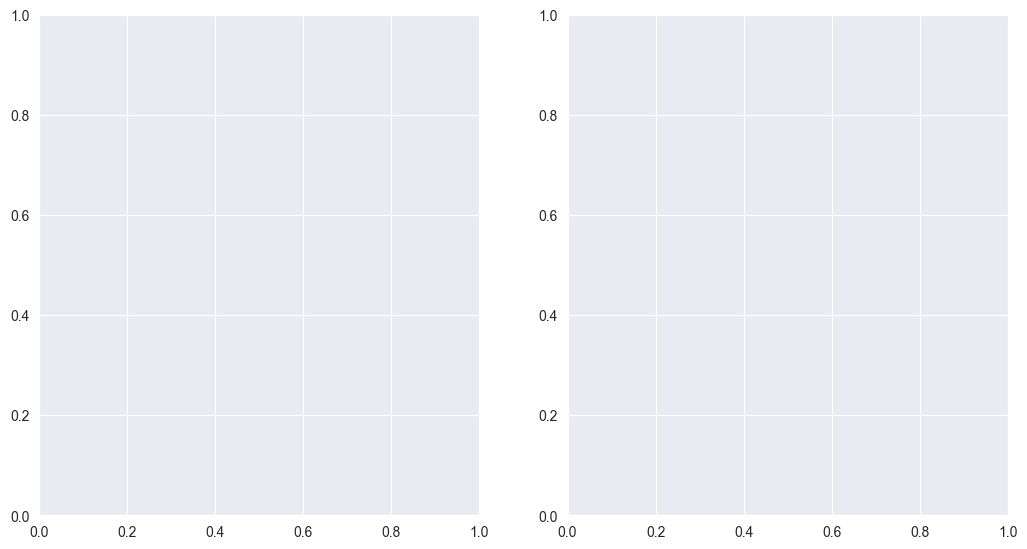

In [97]:
rows=1
cols=2

row=0
col=0
titles = ['Twitter', 'YouTube']
w = [twitter_desc, youtube_desc]
fig, ax = plt.subplots(1, 2, figsize=(12.5,6.5))

masks = [np.array(Image.open('twitter-mask.jpg')), # if masks file not available, comment this part out
		 np.array(Image.open('youtube-mask.jpg'))] # if masks file not available, comment this part out

for i in range(2):
  ax[col].imshow(WordCloud(width = 500, height = 500,
                background_color ='white',
			   	mask=masks[i], # if masks file not available, comment this part out
                min_font_size = 10).generate(w[i]))
  ax[col].axis("off")
  ax[col].set_title(titles[i], fontdict={'fontsize': 12, 'fontweight' : 'bold'})
  row=row+1
  if row==rows:
     row=0
     col=col+1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
plt.show()

---

## Polarity
In this step we will try to perform the polarity of each description. In this case it does not make as much sense as if we would analyse Twitter tweets, or YouTube comments.
But nevertheless, we will try it out. After calculating the polarity, it will be aggregated to the dataframe

In [83]:
df_twitter['polarity'] = df_twitter['description'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
df_youtube['polarity'] = df_youtube['description'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

As seen above, also in this case we use `.describe()` to gain some insights of the new variable `polarity`. For Twitter the mean value is very close to 0 with 0.09, and for YouTube it is slightly higher with 1.13. However, it is notable that for Twitter the max polarity is only 0.5, whereas for YouTube it is 1.0.
Note: The polarity value is in the range between -1 and 1. Where -1 is the worst and 1 the best.

In [84]:
df_twitter.describe()

,links,title length,description length,description token,polarity
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,186.437500,17.229167,688.145833,108.833333,0.091598
std,266.868595,10.139956,686.712396,109.726417,0.118560
min,8.000000,5.000000,77.000000,14.000000,-0.088889
25%,31.000000,12.000000,341.750000,51.750000,0.011806
50%,83.500000,15.000000,490.500000,77.500000,0.072917
75%,216.000000,18.250000,680.000000,108.500000,0.149980
max,1132.000000,59.000000,3520.000000,584.000000,0.500000


In [85]:
df_youtube.describe()

,links,title length,description length,description token,polarity
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,203.675000,18.825000,657.712500,102.150000,0.134878
std,314.559961,10.962277,607.269656,91.043612,0.194517
min,12.000000,4.000000,0.000000,0.000000,-0.225379
25%,31.750000,11.750000,310.500000,48.500000,0.000000
50%,119.000000,16.500000,486.000000,75.500000,0.085795
75%,168.750000,23.250000,800.500000,126.500000,0.203598
max,1745.000000,68.000000,3376.000000,513.000000,1.000000


---

## Graphical analysis
The following section shows the graphical analysis  of the data.

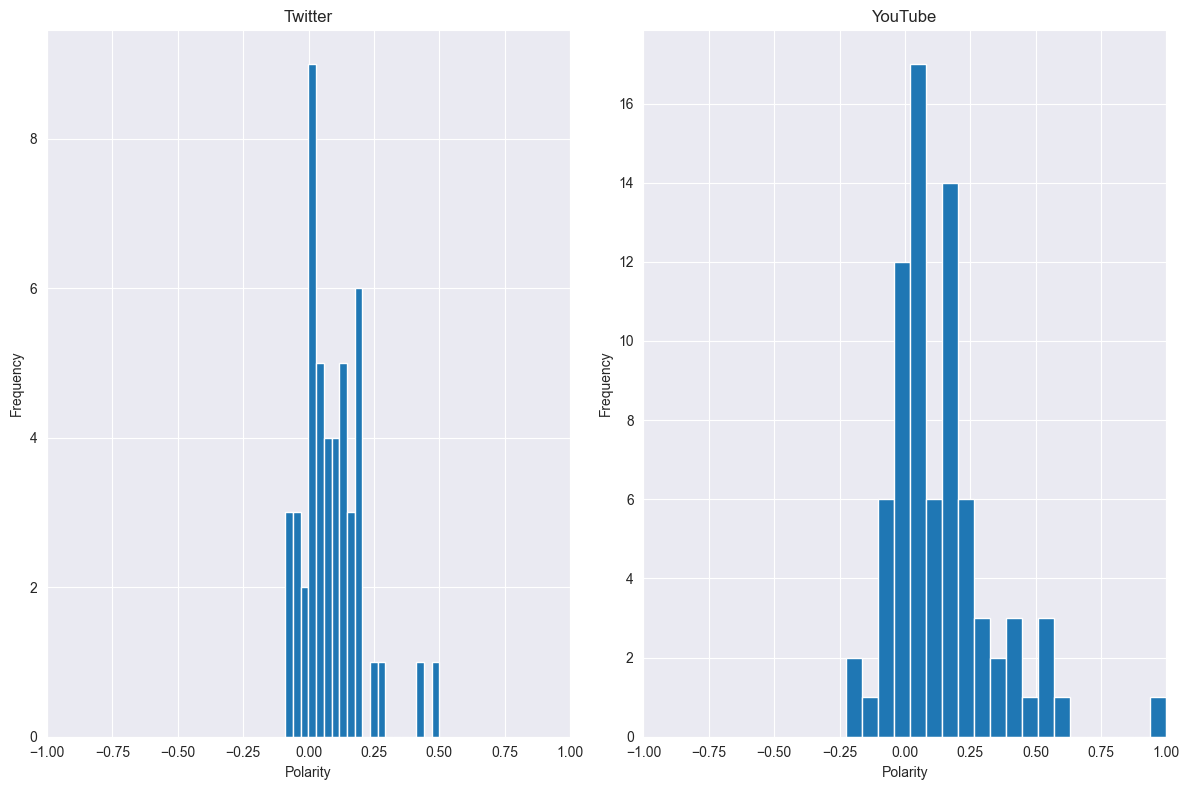

In [30]:
fig,ax = plt.subplots(1, 2)
titles = ['Twitter', 'YouTube']
dfs = [df_twitter, df_youtube]
for i in range(2):
    ax[i].hist(dfs[i]['polarity'], bins=20)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Polarity')
    ax[i].set_xlim((-1, 1))
plt.tight_layout()

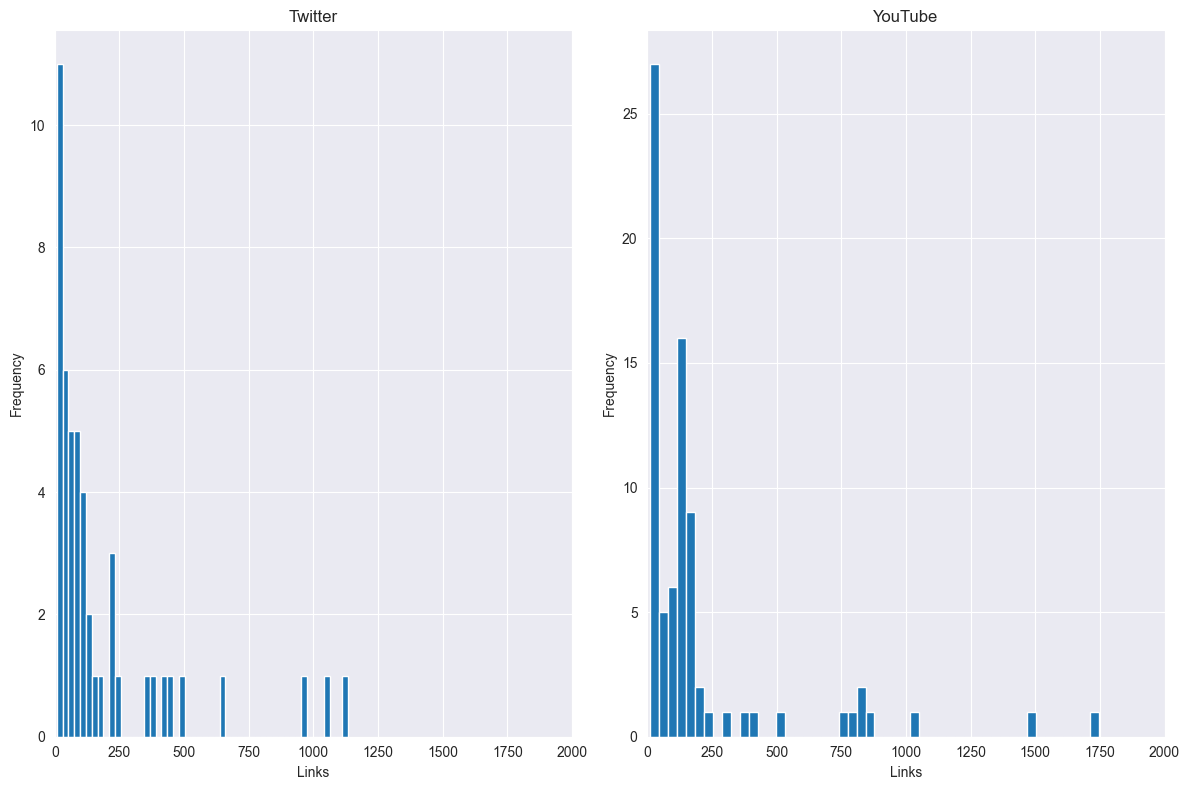

In [31]:
fig,ax = plt.subplots(1, 2)
titles = ['Twitter', 'YouTube']
dfs = [df_twitter, df_youtube]
for i in range(2):
    ax[i].hist(dfs[i]['links'], bins=50)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Links')
    ax[i].set_xlim((0, 2000))
plt.tight_layout()

The following subplot provides an overview of the title length, description length, description token, polarity and links for both topics. On the left side the plots represent Twitter and on the right side YouTube.
The data looks very similar to each other, a difference is the polarity with is higher for YouTube. This realisation was observed already before when looking at the statistical overview of the data.


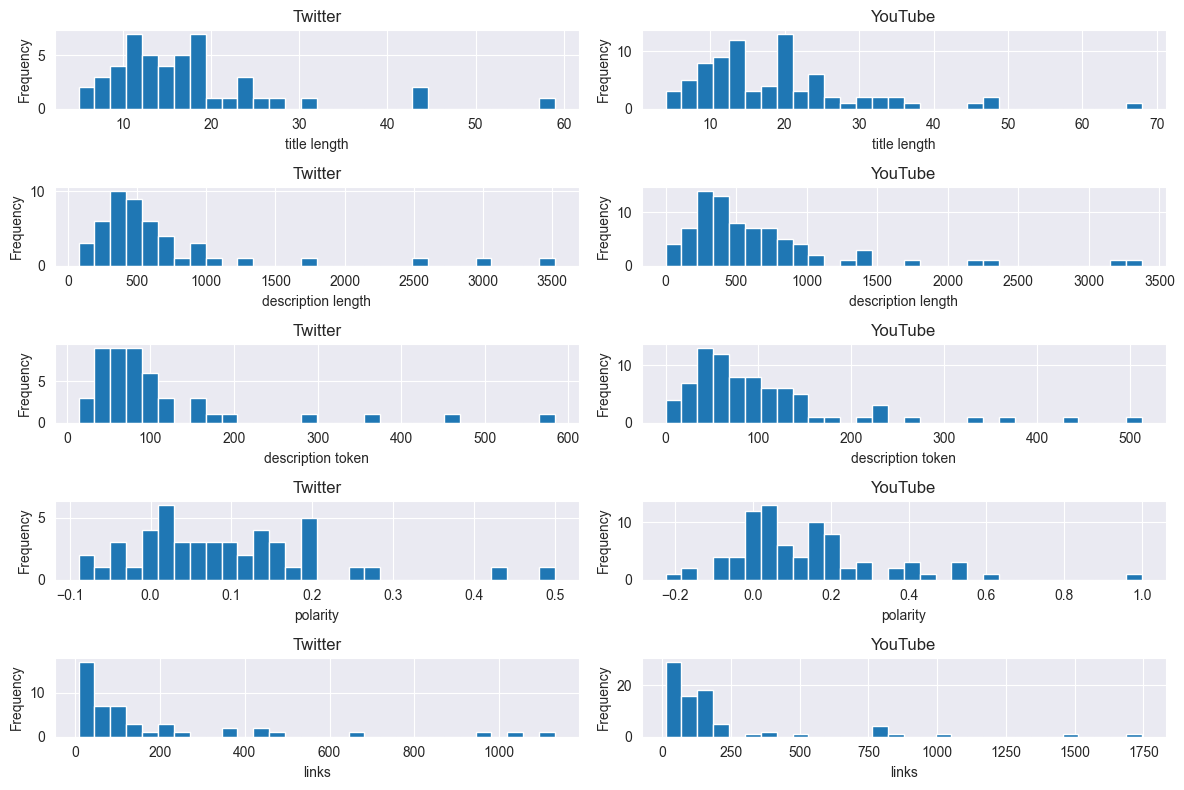

In [86]:
features = ['title length', 'description length', 'description token', 'polarity', 'links']
fig, ax = plt.subplots(len(features), 2)
titles = ['Twitter', 'YouTube']
dfs = [df_twitter, df_youtube]
for i in range(len(features)):
	for j in range(2):
		ax[i][j].hist(dfs[j][features[i]], bins=30)
		ax[i][j].set_title(titles[j])
		ax[i][j].set_ylabel('Frequency')
		ax[i][j].set_xlabel(features[i])
		# ax[i][j].set_xlim((-1, 1))
plt.tight_layout()


The histographs show again the same for Twitter.

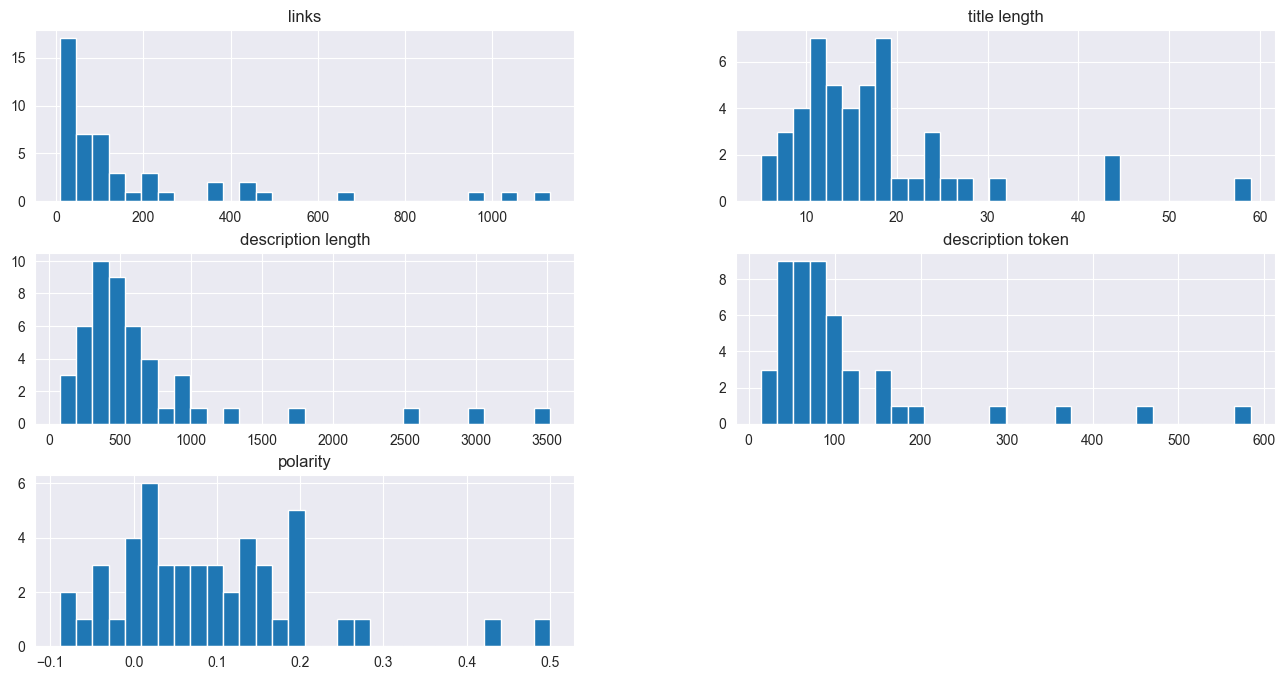

In [89]:
df_twitter.hist(figsize=(16,8), bins=30);

The histographs show again the same for YouTube.

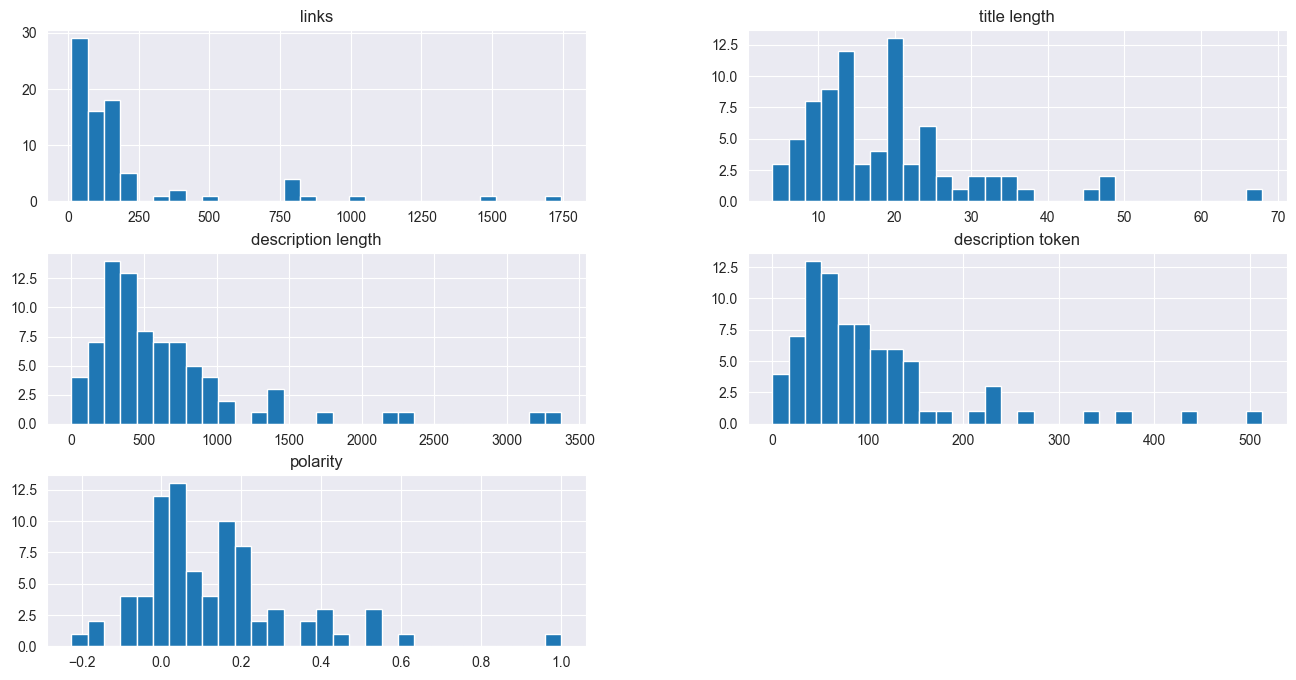

In [90]:
df_youtube.hist(figsize=(16,8), bins=30);

The scatter matrics displays the correlation between two features.
A clear correlation between description length and description token can be seen. This was expectable, since both feature represent basically the same.
For all other features no clear correlation can be observed.

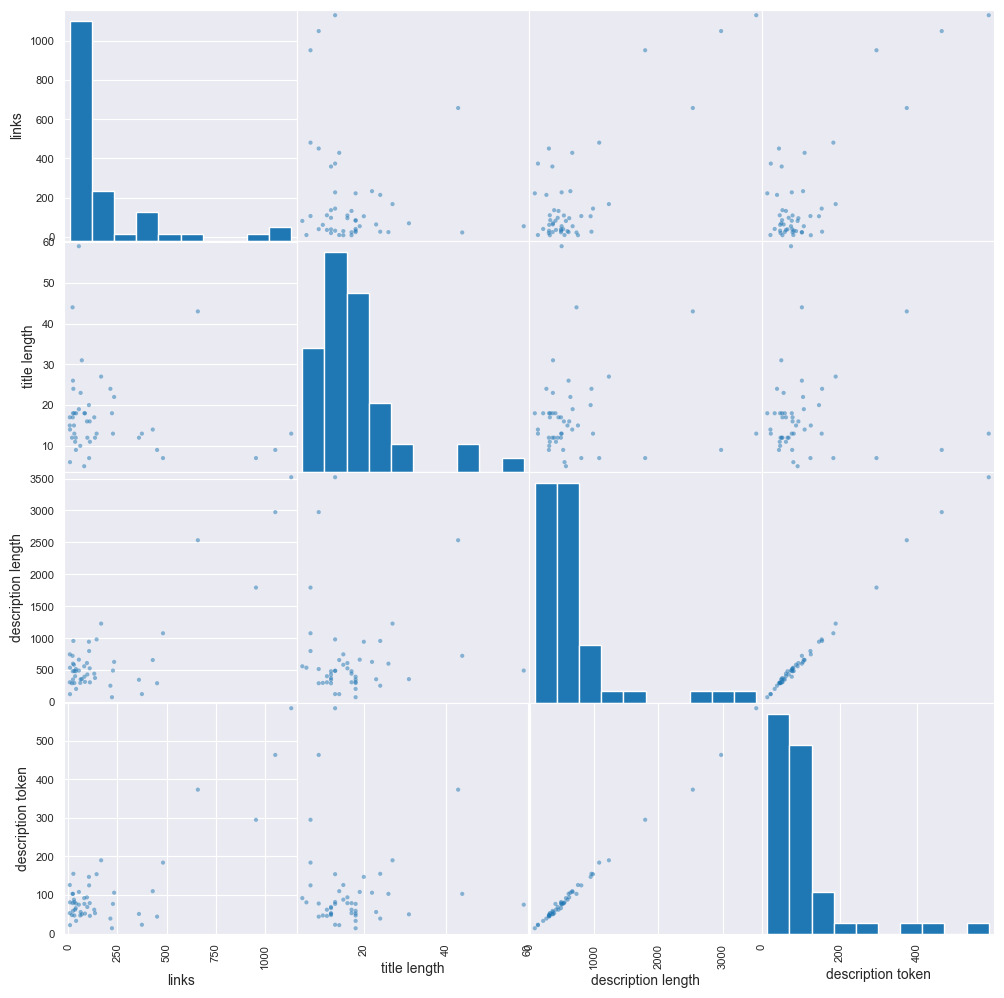

In [35]:
pd.plotting.scatter_matrix(
    df_twitter.select_dtypes(include='number').iloc[:,-5:-1],
    figsize=(12,12)
);

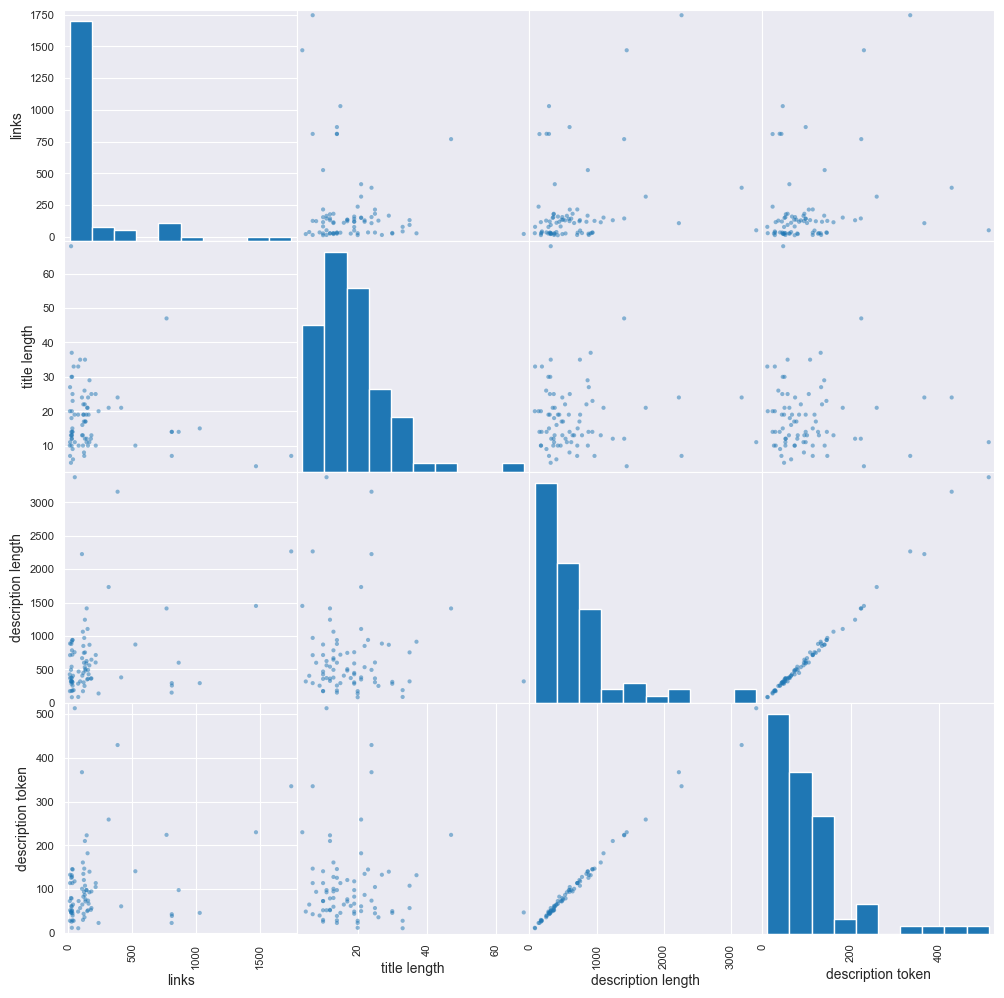

In [36]:
pd.plotting.scatter_matrix(
    df_youtube.select_dtypes(include='number').iloc[:,-5:-1],
    figsize=(12,12)
);

The correlation matrix shows for description length to description token a correlation of 1, which makes absolutely sense.
It is not very surpricing that a correlation between links and description length/token can be found. Since it is likely that longer articles contains more links. However, this insight seems to hold true only for Twitter. YouTube has only a correlation of 0.26 between links and description length/token.


/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_8713/1803644688.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

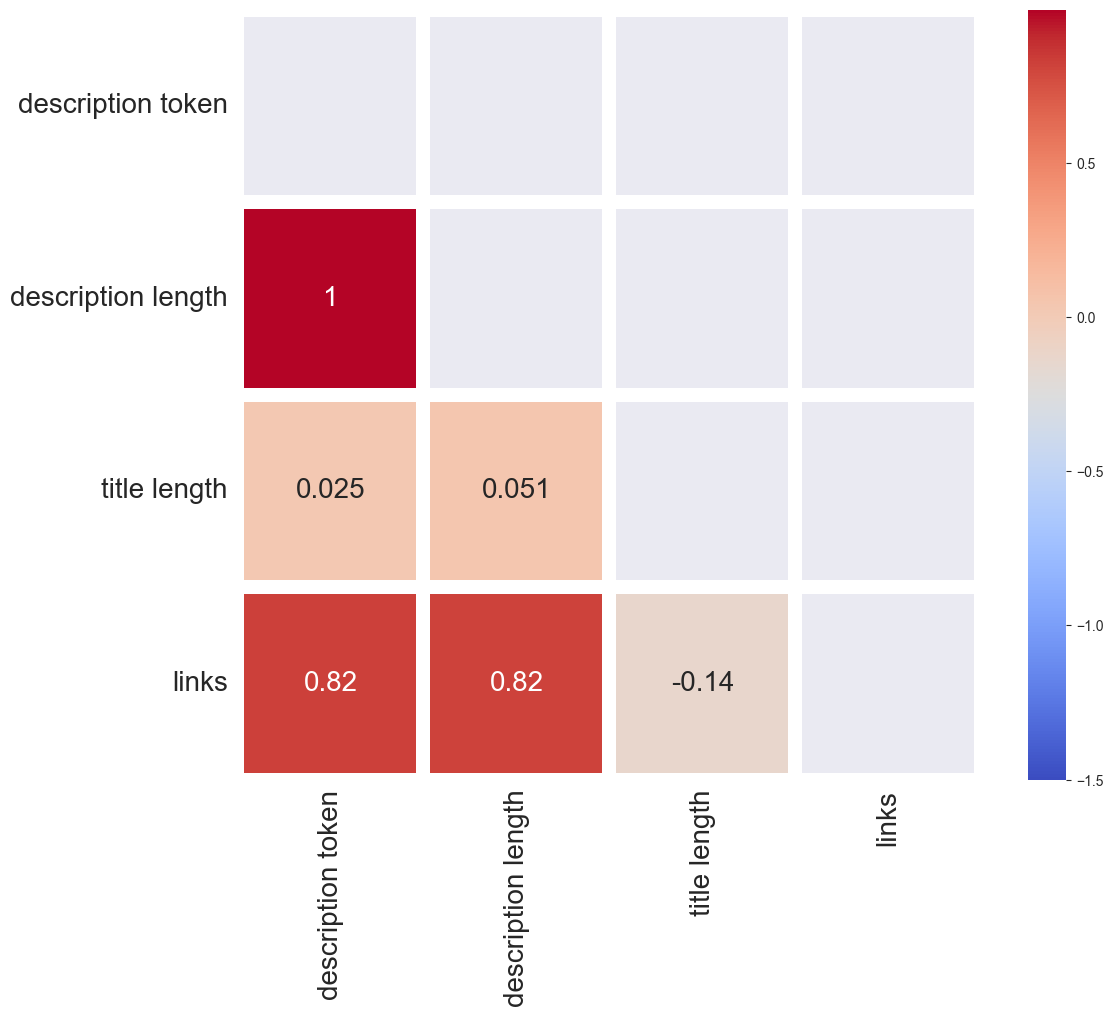

In [92]:
correlation = df_twitter[['description token', 'description length', 'title length', 'links']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)

/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_8713/1827969318.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

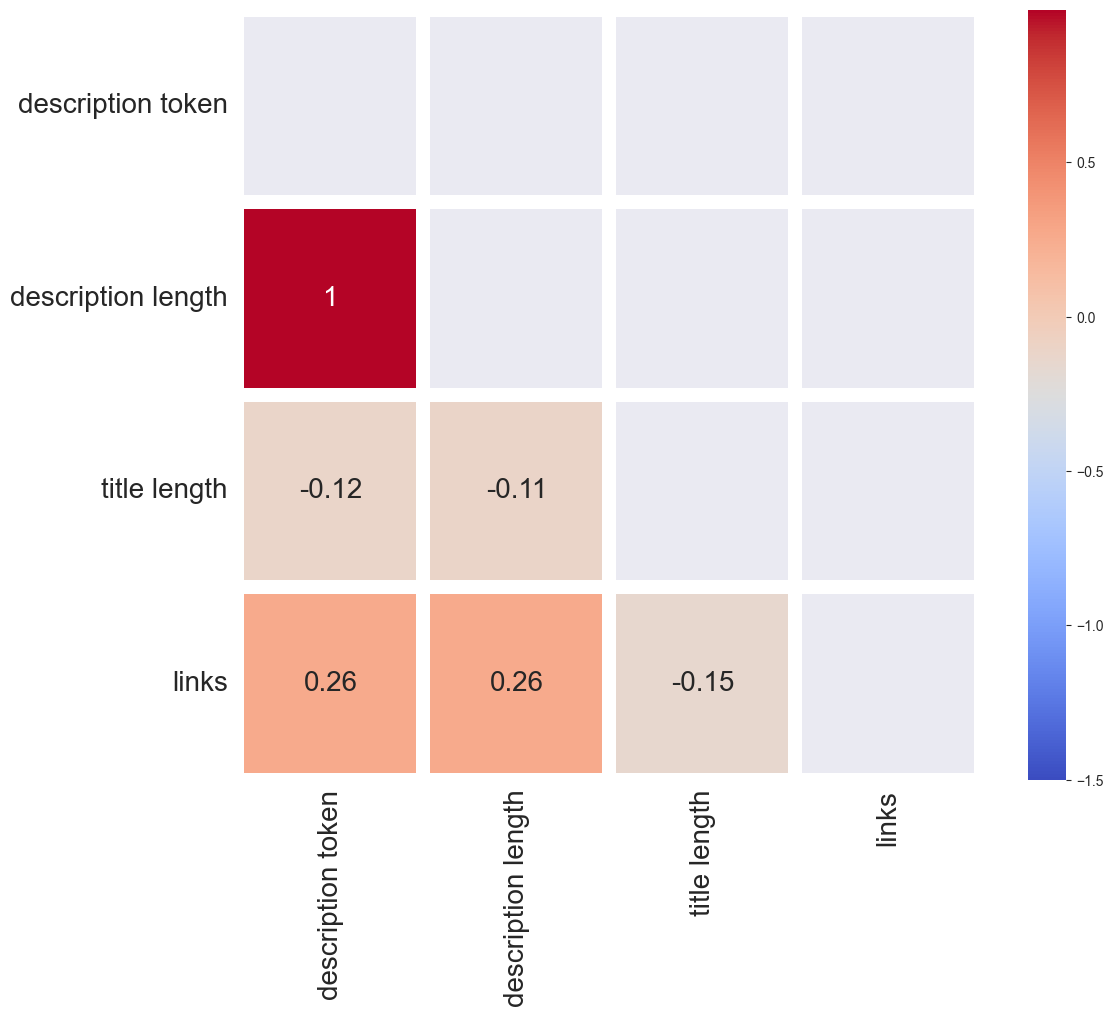

In [93]:
correlation = df_youtube[['description token', 'description length', 'title length', 'links']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)

<AxesSubplot: xlabel='description length', ylabel='polarity'>

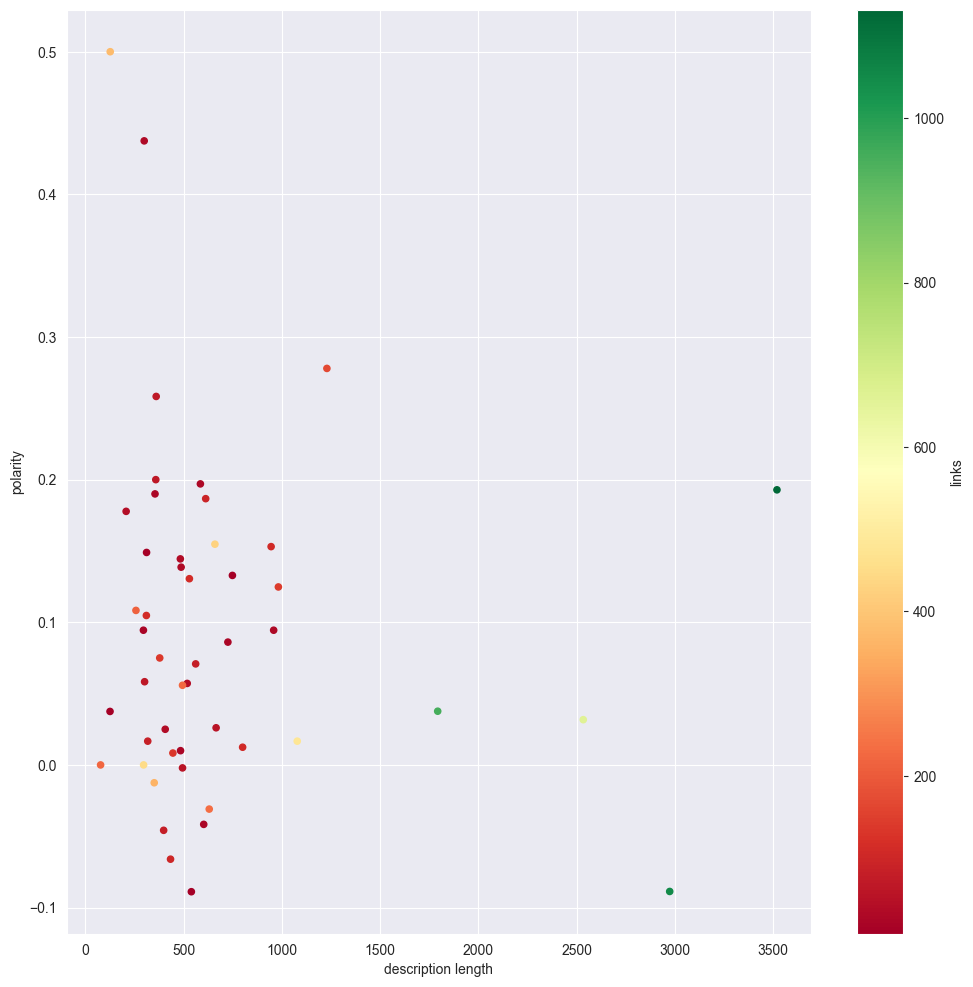

In [37]:
df_twitter.plot(kind='scatter', x='description length', y='polarity', c='links', colormap='RdYlGn', figsize=(12,12))
# plt.ylabel('Length')
# plt.ylabel('Polarity')

<AxesSubplot: xlabel='description length', ylabel='polarity'>

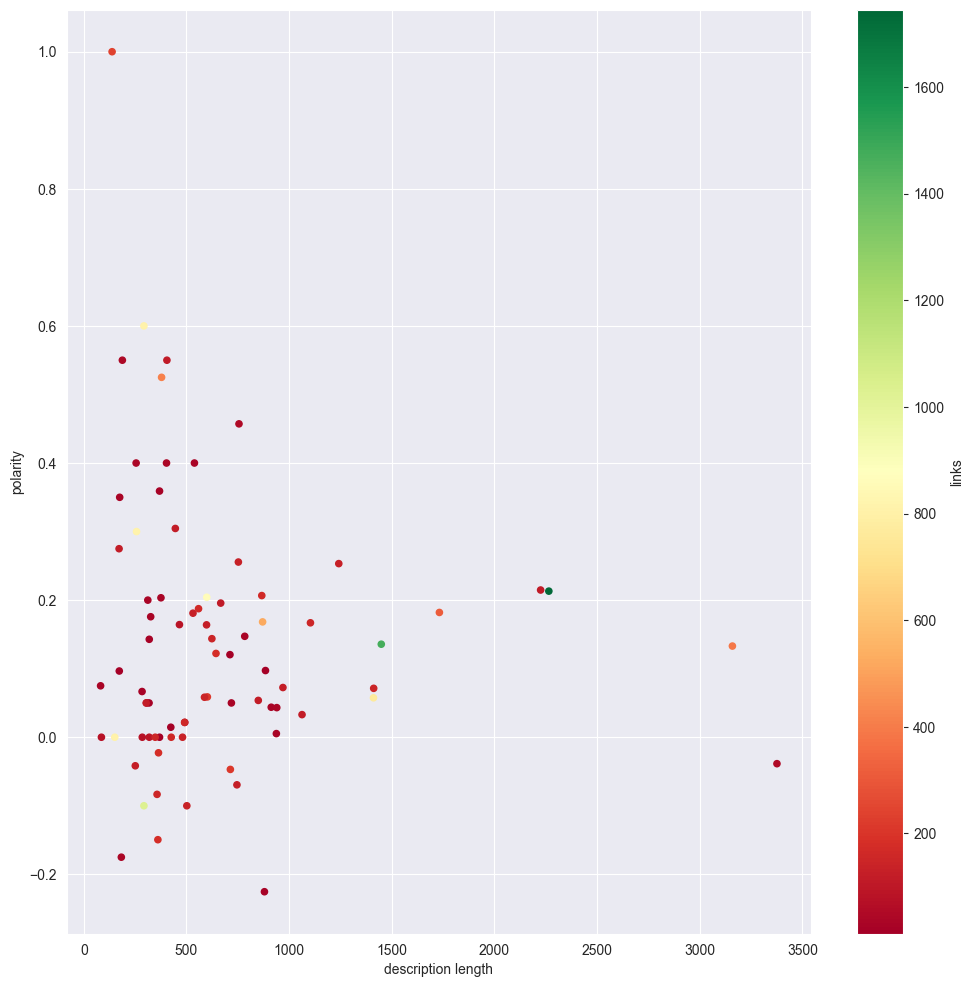

In [38]:
df_youtube.plot(kind='scatter', x='description length', y='polarity', c='links', colormap='RdYlGn', figsize=(12,12))
# plt.ylabel('Length')
# plt.ylabel('Polarity')

---

## N-gramming
### Unigrams with stopwords
The unigrams below shows the count of the words for Twitter and YouTube. In these cases the stop words are not droped from the list.
As it can be seen the word 'the' occurs the most.
These unigrams have no value since only general words are listet (stopwords)

In [39]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
common_words = get_top_n_words(df_twitter['description'], 20)

unigrams_w_stops_twitter = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_w_stops_twitter

,word,count
0,the,305
1,and,171
2,of,146
3,in,118
4,twitter,96
5,to,96
6,by,69
7,is,68
8,on,64
9,with,51


In [41]:
common_words = get_top_n_words(df_youtube['description'], 20)

unigrams_w_stops_youtube = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_w_stops_youtube

,word,count
0,the,442
1,and,280
2,youtube,197
3,of,190
4,to,185
5,in,147
6,on,122
7,as,109
8,is,105
9,was,85


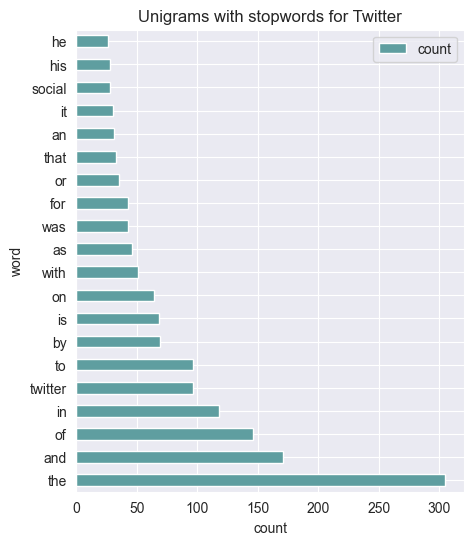

In [42]:
unigrams_w_stops_twitter.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams with stopwords for Twitter')
plt.show()

Text(0.5, 1.0, 'Unigrams with stopwords for YouTube')

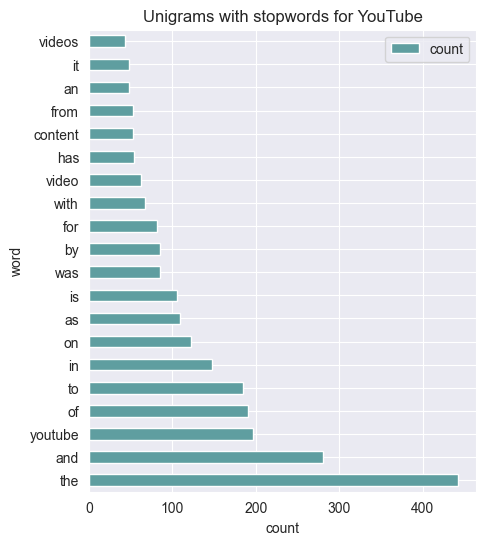

In [43]:
unigrams_w_stops_youtube.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams with stopwords for YouTube')

### Unigrams without stopwords
In the example onwards the stopwords are droped.
This results into more valuable insights of the data.

In [51]:
# Unigrams after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [52]:
common_words = get_top_n_words(df_twitter['description'], 20)
unigrams_twitter = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_twitter

,word,count
0,twitter,96
1,social,28
2,tweets,24
3,users,18
4,media,17
5,world,15
6,series,15
7,musk,14
8,company,13
9,bieber,13


In [53]:
common_words = get_top_n_words(df_youtube['description'], 20)
unigrams_youtube = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_youtube

,word,count
0,youtube,197
1,video,62
2,content,53
3,videos,43
4,music,36
5,channel,36
6,google,35
7,event,30
8,series,26
9,website,22


The unigrams show clearly which words are used the most. A very similar finding could already be found with the Word Cloud performed above.

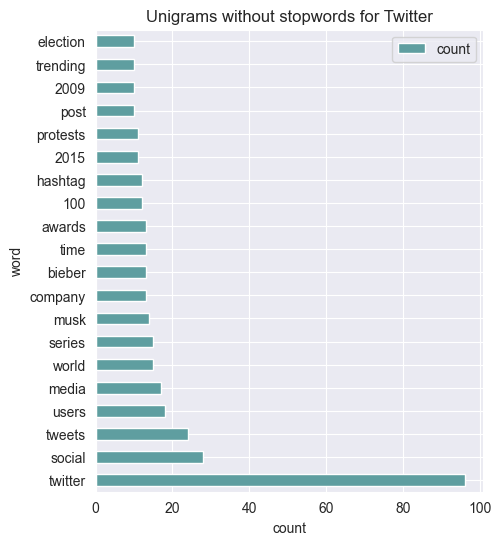

In [54]:
unigrams_twitter.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams without stopwords for Twitter')
plt.show()

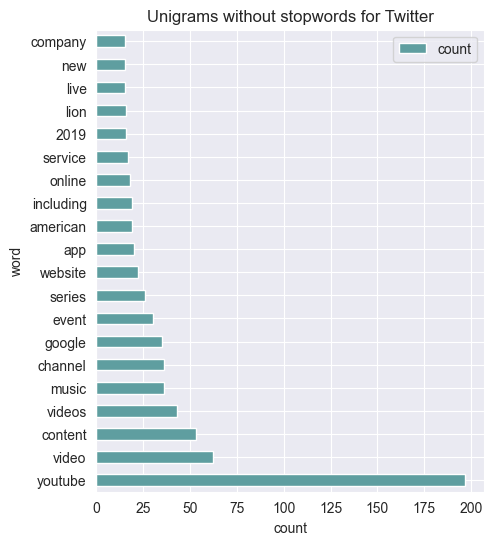

In [55]:
unigrams_youtube.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams without stopwords for Twitter')
plt.show()

### Bigrams
The bigrams shows the same as the unigram, but in this case, two words are always taken together.

In [56]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
common_words = get_top_n_bigram(df_twitter['description'], 20)
bigrams_twitter = pd.DataFrame(common_words, columns = ['word' , 'count'])

In [58]:
common_words = get_top_n_bigram(df_youtube['description'], 20)
bigrams_youtube = pd.DataFrame(common_words, columns = ['word' , 'count'])

Text(0.5, 1.0, 'Bigrams w/o stopwords for Twitter')

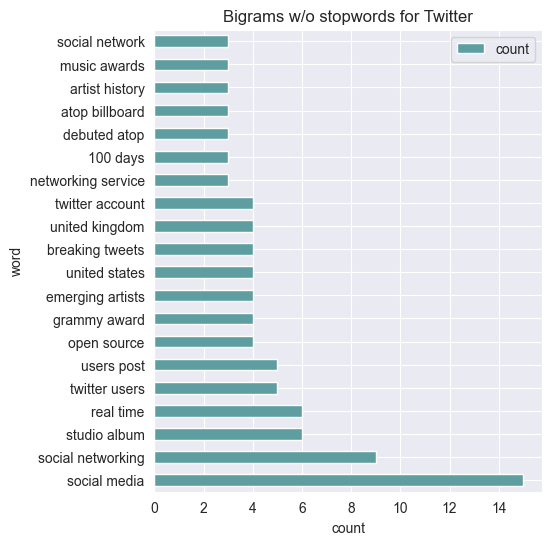

In [59]:
bigrams_twitter.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Bigrams w/o stopwords for Twitter')

Text(0.5, 1.0, 'Bigrams w/o stopwords for YouTube')

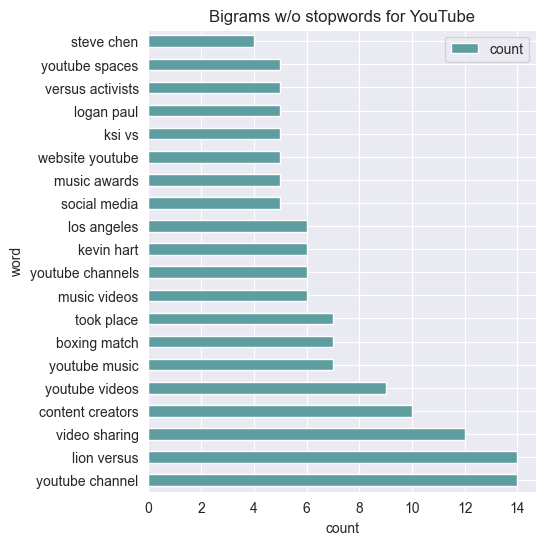

In [60]:
bigrams_youtube.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Bigrams w/o stopwords for YouTube')

### Trigrams
In this case three words are taken together.
Most probably not enough data is available, therefore the following graphs do not have any meaning.

In [61]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [62]:
common_words = get_top_n_trigram(df_twitter['description'], 20)
trigrams_twitter = pd.DataFrame(common_words, columns = ['word' , 'count'])

In [63]:
common_words = get_top_n_trigram(df_youtube['description'], 20)
trigrams_youtube = pd.DataFrame(common_words, columns = ['word' , 'count'])

Text(0.5, 1.0, 'Trigrams w/o stopwords for Twitter')

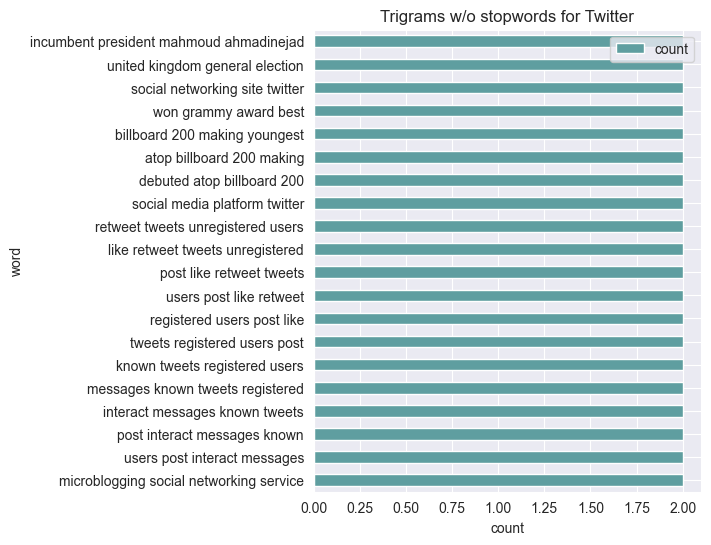

In [64]:
trigrams_twitter.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Trigrams w/o stopwords for Twitter')

Text(0.5, 1.0, 'Trigrams w/o stopwords for YouTube')

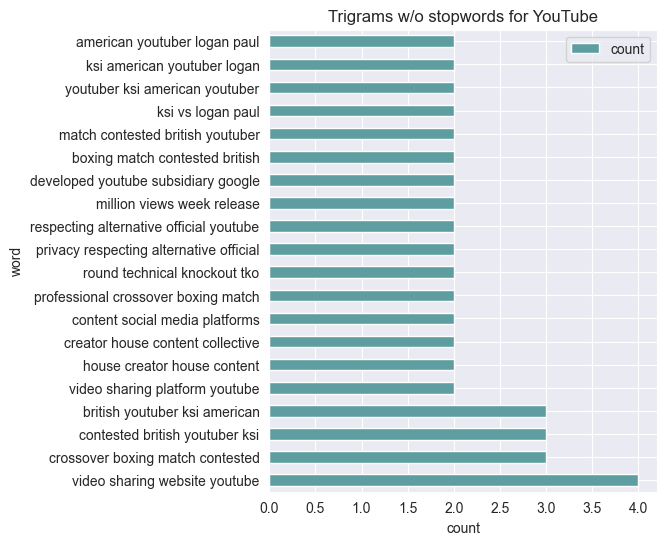

In [65]:
trigrams_youtube.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Trigrams w/o stopwords for YouTube')

---

## Summary

The above exercise is clearly valuable, however to get really fluent in performing such analysis it has to be conducted on a regular basis. A few functions were really self-explanatory. Some others where more difficult and a look in the documentation was neccessary.

The polarity method is a great tool when used on the right dataset, but for this dataset it did not make any sense. The wikipedia articles are written from a very objective perspectiv without judgment if something is good or bad. Therefore, the polarity was very close to zero.
It would be really interesting to analyse Twitter tweets or YouTube comments with the same method. (I am not sure if YouTube comment make sense, since YouTube deletes almost all negative comments.)

The Word Cloud is a nice tool to gain a overview, but it is more to play around and not to get a clear insight. To get a clear insight it is better to use a unigram or a bigram. In my case the dataset was to small to perform the trigram and get useful information out of it.